In [1]:
# Importar librerias
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
df_train = pd.read_csv('./source/train.csv')
df_train.head(5)
df_test = pd.read_csv('./source/test.csv')

In [3]:
df_train.shape

(1460, 81)

In [65]:
df_train.select_dtypes('object').count()

MSZoning         1092
Street           1092
LotShape         1092
LandContour      1092
Utilities        1092
LotConfig        1092
LandSlope        1092
Neighborhood     1092
Condition1       1092
Condition2       1092
BldgType         1092
HouseStyle       1092
RoofStyle        1092
RoofMatl         1092
Exterior1st      1092
Exterior2nd      1092
MasVnrType       1092
ExterQual        1092
ExterCond        1092
Foundation       1092
BsmtQual         1092
BsmtCond         1092
BsmtExposure     1092
BsmtFinType1     1092
BsmtFinType2     1092
Heating          1092
HeatingQC        1092
CentralAir       1092
Electrical       1092
KitchenQual      1092
Functional       1092
GarageType       1092
GarageFinish     1092
GarageQual       1092
GarageCond       1092
PavedDrive       1092
SaleType         1092
SaleCondition    1092
dtype: int64

In [4]:
df_test.shape

(1459, 80)

In [5]:
print('Antes de quitar columnas', df_train.shape)
df_train.drop(['Id','PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu'], axis = 1, inplace = True)
print('Despues de quitar columnas', df_train.shape)

Antes de quitar columnas (1460, 81)
Despues de quitar columnas (1460, 75)


In [6]:
# Eliminamos los datos NAN
df_train.dropna(inplace = True)
df_train.shape

(1094, 75)

In [7]:
df_nulls = df_train.isnull().sum().reset_index()
df_nulls.sort_values(0, ascending = False).head(15)

,index,0
0,MSSubClass,0
56,GarageYrBlt,0
54,Fireplaces,0
53,Functional,0
52,TotRmsAbvGrd,0
51,KitchenQual,0
50,KitchenAbvGr,0
49,BedroomAbvGr,0
48,HalfBath,0
47,FullBath,0


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

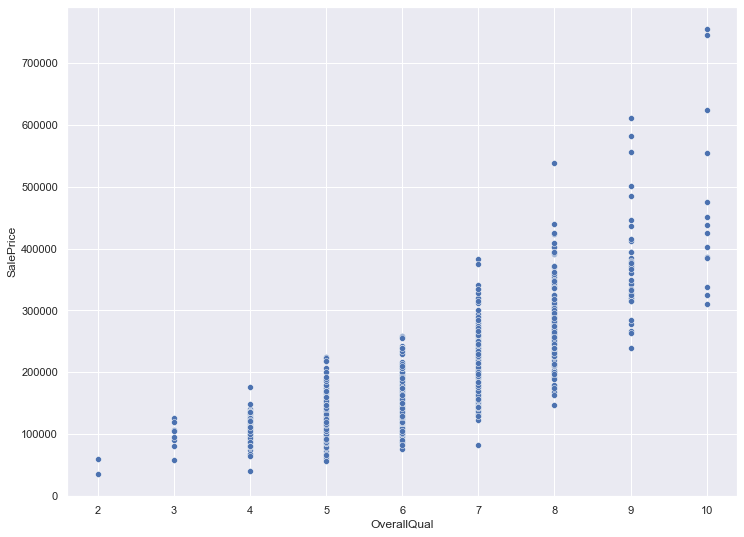

In [66]:
#Exploración de datos, grafica de disperción entre acabados y el precio de las casas
plt.subplots(figsize=(12, 9))
sns.scatterplot(x='OverallQual',y='SalePrice',data=df_train)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

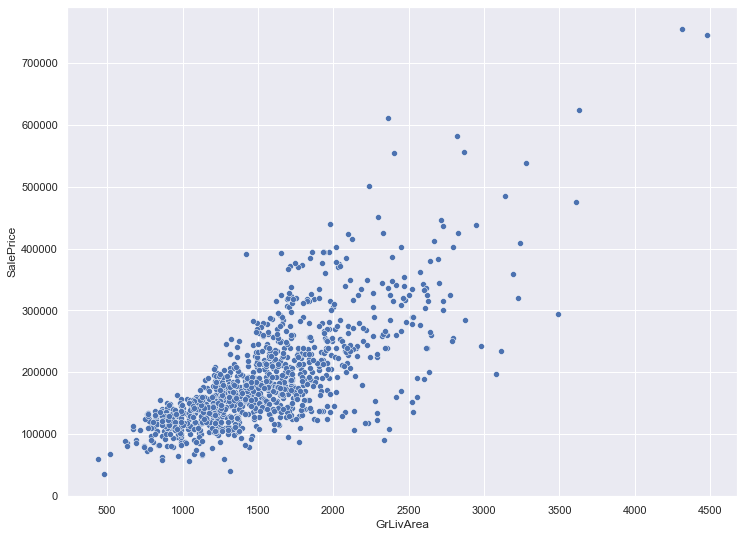

In [67]:
# ahora graficamos el área de la constucción relacionada con el precio
plt.subplots(figsize=(12, 9))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [70]:
# Filtramos datos para evitar los outliers

df_train=df_train.drop(df_train.loc[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<200000)].index,0)
df_train.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

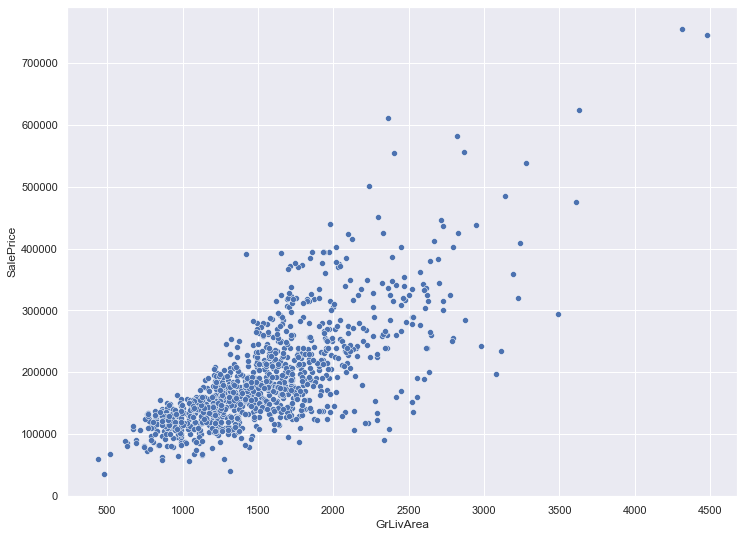

In [71]:
plt.subplots(figsize=(12, 9))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1092 non-null   int64  
 1   MSZoning       1092 non-null   object 
 2   LotFrontage    1092 non-null   float64
 3   LotArea        1092 non-null   int64  
 4   Street         1092 non-null   object 
 5   LotShape       1092 non-null   object 
 6   LandContour    1092 non-null   object 
 7   Utilities      1092 non-null   object 
 8   LotConfig      1092 non-null   object 
 9   LandSlope      1092 non-null   object 
 10  Neighborhood   1092 non-null   object 
 11  Condition1     1092 non-null   object 
 12  Condition2     1092 non-null   object 
 13  BldgType       1092 non-null   object 
 14  HouseStyle     1092 non-null   object 
 15  OverallQual    1092 non-null   int64  
 16  OverallCond    1092 non-null   int64  
 17  YearBuilt      1092 non-null   int64  
 18  YearRemo

In [13]:
# Creo una tabla de correlación para ver qué atributos tienen mayor inferencia en el precio de las casas
df_corr = df_train.corr().sort_values(by='SalePrice', ascending= False).round(2)
df_corr.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.09,0.36,0.31,0.80,-0.14,0.52,0.52,0.49,0.41,-0.04,...,0.33,0.35,-0.16,0.03,0.11,0.10,-0.04,0.05,-0.01,1.00
OverallQual,0.03,0.22,0.15,1.00,-0.19,0.59,0.57,0.41,0.21,-0.08,...,0.27,0.32,-0.15,0.02,0.05,0.05,-0.06,0.09,-0.00,0.80
GrLivArea,0.08,0.34,0.26,0.61,-0.11,0.19,0.29,0.39,0.15,-0.04,...,0.27,0.32,-0.02,0.01,0.12,0.13,0.00,0.06,-0.02,0.74
TotalBsmtSF,-0.29,0.33,0.26,0.55,-0.26,0.44,0.31,0.37,0.44,0.08,...,0.23,0.25,-0.15,0.05,0.08,0.06,-0.04,0.01,0.01,0.68
1stFlrSF,-0.27,0.40,0.28,0.52,-0.17,0.31,0.29,0.34,0.41,0.08,...,0.24,0.21,-0.11,0.04,0.10,0.06,-0.03,0.03,0.00,0.65


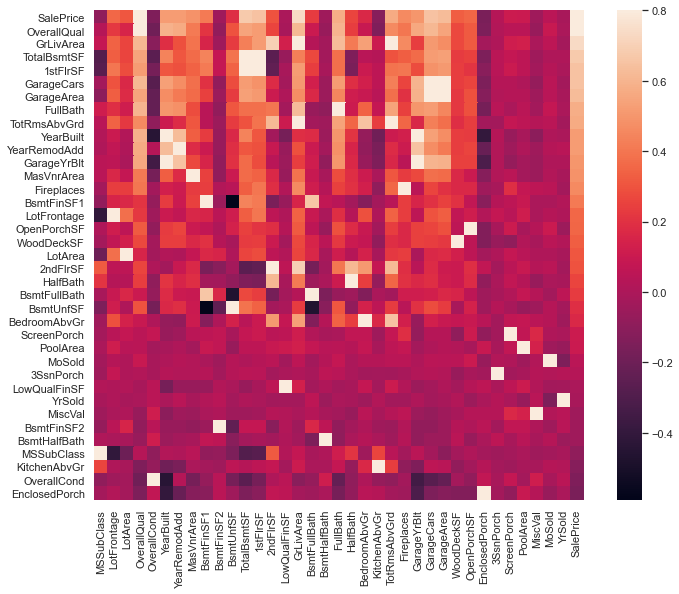

In [72]:
plt.subplots(figsize=(12, 9))
sns.heatmap(df_corr, vmax=.8, square=True);

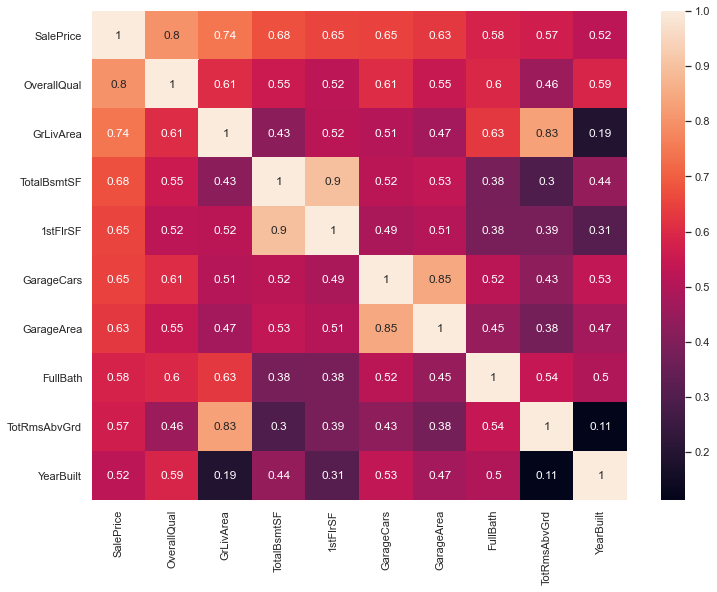

In [73]:
# Hacemos un heatmap de los 10 campos que mas relación tienen con el precio
columnas = df_corr['SalePrice'].head(10).index
com = np.corrcoef(df_train[columnas].values.T)
plt.subplots(figsize=(12, 9))
sns.set(font_scale=1)
hm = sns.heatmap(com, annot=True, yticklabels=columnas.values, xticklabels=columnas.values)
plt.show()

In [18]:
# Se crean las cantidades de registros para las pruebas
trainrow=df_train.shape[0]
testrow=df_test.shape[0]
trainrow, testrow

(1092, 1459)

In [23]:
# se crea un arreglo para los IDs del conjunto de pruebas
testids = df_test['Id'].copy()
# testids

In [21]:
# se crea la variable dependiente, precios de venta
y_train=df_train['SalePrice'].copy()

In [29]:
data=pd.concat((df_train,df_test)).reset_index(drop=True)
data=data.drop('SalePrice',1)
data=data.drop('Id',axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,NaN,NaN,NaN,NaN,NaN
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,NaN,NaN,NaN,NaN,NaN
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,NaN,NaN,NaN,NaN,NaN
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,NaN,NaN,NaN,NaN,NaN
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,NaN,NaN,NaN,NaN,NaN


In [31]:
#revisando datos nulos
missing = data.isnull().sum().sort_values(ascending=False)
#Elimino las filas que no tienen datos nulos
missing = missing.drop(missing[missing==0].index)
missing

PoolQC          2548
MiscFeature     2500
Alley           2444
Fence           2261
FireplaceQu     1822
LotFrontage      227
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Exterior1st        1
Exterior2nd        1
KitchenQual        1
SaleType           1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [33]:
# Rellenar los valores nullos con NA para variables categóricas
for cols in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageQual','GarageFinish','BsmtQual'
             , 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    data[cols].fillna("NA",inplace=True)
    
for cols in ['GarageYrBlt','GarageType','GarageCars', 'GarageArea']:
    data[cols].fillna(0,inplace=True)
    
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [36]:
# data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].dropna().sort_values().index[0])
data['Utilities']=data['Utilities'].fillna(data['Utilities'].dropna().sort_values().index[0])
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)
data['Functional']=data['Functional'].fillna(data['Functional'].dropna().sort_values().index[0])
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')
data['Exterior1st']=data['Exterior1st'].fillna('NA')
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)
data['SaleType']=data['SaleType'].fillna(data['SaleType'].dropna().sort_values().index[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].dropna().sort_values().index[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].dropna().sort_values().index[0])
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].dropna().mean())

In [38]:
# Validamos si aún hay valores nulos
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [104]:
# generamos una sola columna para los pies cuadrados construidos
data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(['1stFlrSF','2ndFlrSF'],1)



KeyError: '1stFlrSF'

In [105]:
df_train['Floorfeet']=df_train['1stFlrSF']+df_train['2ndFlrSF']
df_train['Floorfeet']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1087    1647
1088    2073
1089    2340
1090    1078
1091    1256
Name: Floorfeet, Length: 1092, dtype: int64

In [108]:
plt.figure(figsize=(7,8))
px.scatter(df_train,x='Floorfeet',y='SalePrice',color='SalePrice')

<Figure size 504x576 with 0 Axes>

In [75]:
fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(y=df_train['SalePrice'][df_train['MSZoning']=='RL'],name='Res. Low Density'))
fig.add_trace(go.Box(y=df_train['SalePrice'][df_train['MSZoning']=='RM'],name='Res. Med Density'))
fig.add_trace(go.Box(y=df_train['SalePrice'][df_train['MSZoning']=='RH'],name='Res. Hig Density'))
fig.add_trace(go.Box(y=df_train['SalePrice'][df_train['MSZoning']=='C (all)'],name='Commercial'))
fig.add_trace(go.Box(y=df_train['SalePrice'][df_train['MSZoning']=='FV'],name='Village Res.'))
fig.update_layout(
    title={
        'text': 'Precios por zona',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [41]:
# aplicando ANOVA de una vía para confirmar lo que se observa en la gráfica
PrecioRL = df_train['SalePrice'][df_train['MSZoning']=='RL']
PrecioRM = df_train['SalePrice'][df_train['MSZoning']=='RM']
PrecioRH = df_train['SalePrice'][df_train['MSZoning']=='RH']
PrecioC  = df_train['SalePrice'][df_train['MSZoning']=='C (all)']
PrecioVR = df_train['SalePrice'][df_train['MSZoning']=='FV']

anova = f_oneway(PrecioRL, PrecioRM, PrecioRH, PrecioC, PrecioVR)
anova

F_onewayResult(statistic=33.76251871786389, pvalue=1.392070266525434e-26)

In [42]:
# APLICANDO ANOVA con más de una vía para ver que variables inciden en el precio de la propiedad
formula = 'SalePrice ~ MSZoning + HeatingQC + LotConfig + LandContour + HouseStyle'
model = sm.formula.ols(formula, data= df_train).fit()
aov_table =  sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
MSZoning,3.790542e+11,4.0,20.346632,3.602229e-16
HeatingQC,9.028156e+11,4.0,48.460770,1.724429e-37
LotConfig,1.074612e+11,4.0,5.768236,1.357457e-04
LandContour,1.290745e+11,3.0,9.237842,4.916708e-06
HouseStyle,3.035382e+11,7.0,9.310362,3.136000e-11
Residual,4.978820e+12,1069.0,NaN,NaN


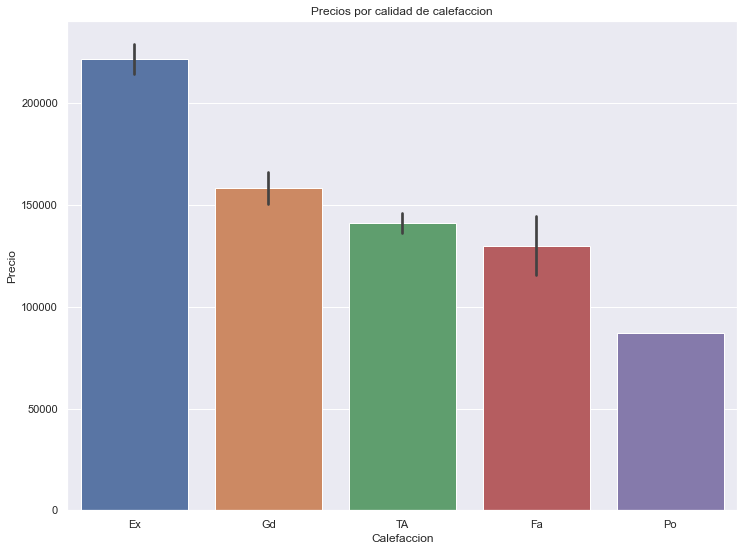

In [76]:
plt.subplots(figsize=(12, 9))
sns.set_context()
ax = sns.barplot(data = df_train, x = df_train['HeatingQC'],y = df_train['SalePrice'])
ax.set_title("Precios por calidad de calefaccion")
ax.set(xlabel='Calefaccion', ylabel='Precio')
ax.set_xticklabels(ax.get_xticklabels());

In [82]:
# Regresión lineal, se consideran solo campos con valores reales o numéricos
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','TotRmsAbvGrd']]
# X = df_train[['GrLivArea']]
y = df_train['SalePrice']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

form2 = 'SalePrice ~ GrLivArea'
# 'SalePrice ~ OverallQual + GrLivArea + GarageCars + GarageArea + TotalBsmtSF + 1stFlrSF + 2ndFlrSF + TotRmsAbvGrd'
mod2 = sm.formula.ols(form2, data=df_train).fit() 
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     600.8
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:11:35   Log-Likelihood:                -12996.
No. Observations:                1092   AIC:                         2.601e+04
Df Residuals:                    1083   BIC:                         2.606e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.215e+05   6443.390    -18.863      0.000   -1.34e+05   -1.09e+05
OverallQual    2.27e+04   1176.967     19.287      0.000    2.04e+04     2.5e+04
GrLivArea       11.8302     26.160      0.452      0.651     -39.500      63.160
GarageCars    4568.1559   3328.791      1.372      0.170   -1963.455    1.11e+04
GarageArea      42.8919     11.063      3.877      0.000      21.185      64.599
TotalBsmtSF     67.3175      6.968      9.661      0.000      53.645      80.990
1stFlrSF        39.5079     27.485      1.437      0.151     -14.422      93.438
2ndFlrSF        57.5131     26.316      2.185      0.029       5.877     109.149
TotRmsAbvGrd -3270.0517   1263.894     -2.587      0.010   -5750.009    -790.094
==============================================================================
Omnibus:                      260.024   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1844.745
Skew:                           0.901   Prob(JB):                         0.00
Kurtosis:                       9.107   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

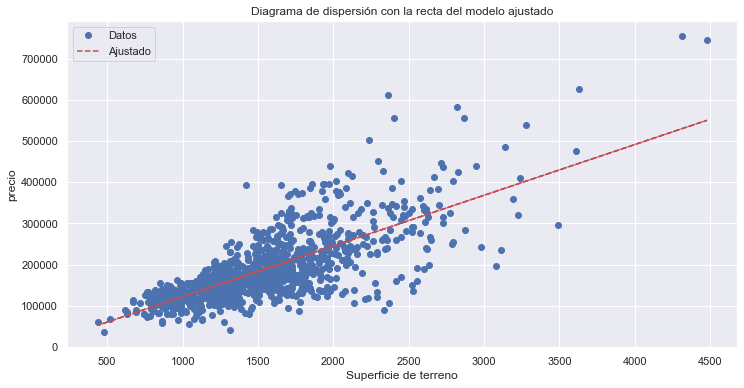

In [78]:
fig, ax = plt.subplots(figsize=(12,6))                                    # Ajuste del gráfico
ax.plot(df_train["GrLivArea"] , df_train["SalePrice"] , 'o', label="Datos")                         # Ajuste para las etiquetas del gráfico
ax.plot(df_train["GrLivArea"], mod2.fittedvalues, 'r--', label="Ajustado")           # Ajuste para las etiquetas del gráfico
legend = ax.legend(loc=2)                                           # Ajustes para las leyendas del gráfico
plt.xlabel('Superficie de terreno')                                          # Etiqueta del eje X
plt.ylabel('precio')                                               # Etiqueta del eje Y
plt.title('Diagrama de dispersión con la recta del modelo ajustado');    # Título del gráfico

In [83]:
df_corr = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF'
                    , '2ndFlrSF','TotRmsAbvGrd','SalePrice']].corr()
df_corr

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,SalePrice
OverallQual,1.000000,0.606938,0.605730,0.548841,0.552992,0.522288,0.258600,0.457335,0.801922
GrLivArea,0.606938,1.000000,0.509703,0.470253,0.426925,0.520130,0.698266,0.832557,0.743668
GarageCars,0.605730,0.509703,1.000000,0.848366,0.519196,0.486894,0.177949,0.430252,0.653109
GarageArea,0.548841,0.470253,0.848366,1.000000,0.533841,0.509748,0.110583,0.377842,0.629971
TotalBsmtSF,0.552992,0.426925,0.519196,0.533841,1.000000,0.898399,-0.259649,0.295966,0.676101
1stFlrSF,0.522288,0.520130,0.486894,0.509748,0.898399,1.000000,-0.242791,0.385420,0.653758
2ndFlrSF,0.258600,0.698266,0.177949,0.110583,-0.259649,-0.242791,1.000000,0.621576,0.304321
TotRmsAbvGrd,0.457335,0.832557,0.430252,0.377842,0.295966,0.385420,0.621576,1.000000,0.566742
SalePrice,0.801922,0.743668,0.653109,0.629971,0.676101,0.653758,0.304321,0.566742,1.000000


In [84]:
# Comparativa de precios de las casas por años
df_train_1990 = df_train[df_train['YearBuilt'] < 1991].reset_index(drop=True)
df_train_1991 = df_train[df_train['YearBuilt'] >= 1991].reset_index(drop=True)


(0.0, 800000.0)

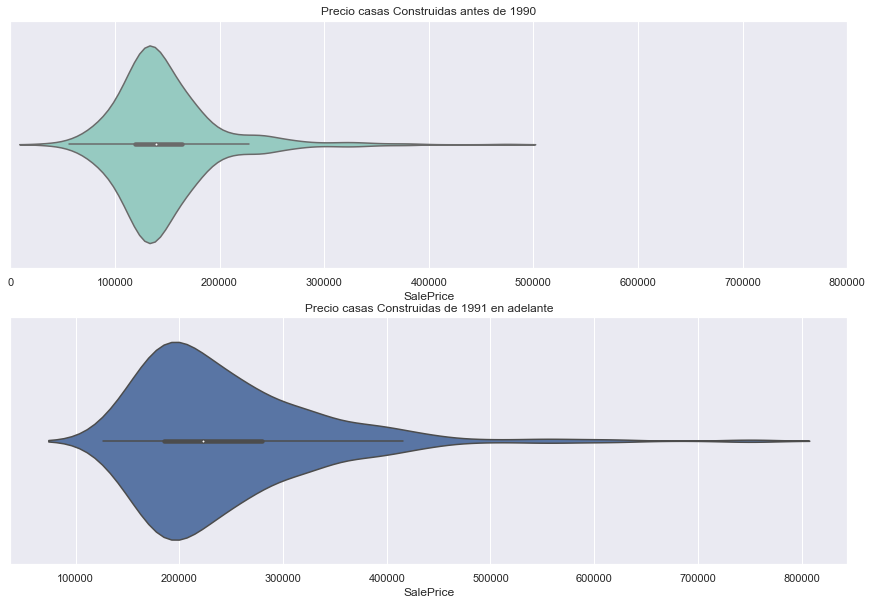

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))
sns.violinplot(x=df_train_1990['SalePrice'], ax = axes[0], palette='Set3')
axes[0].set_title('Precio casas Construidas antes de 1990')
axes[0].set_xlim([0,800000])
sns.violinplot(x=df_train_1991['SalePrice'], ax = axes[1])
axes[1].set_title('Precio casas Construidas de 1991 en adelante')
axes[0].set_xlim([0,800000])

In [85]:
# Grafica para tratar de hacer una linea de tiempo
df_ts = df_train[['YearBuilt','SalePrice']]
df_ts = df_ts[df_train['YearBuilt'] >= 1944]
df_ts['DateBuilt'] = pd.to_datetime(df_ts['YearBuilt'], format="%Y")
df_ts = df_ts[['DateBuilt','SalePrice']]
df_ts = df_ts.groupby(['DateBuilt'], as_index=True).mean()
# df_ts_2 = df_ts.reset_index()

In [86]:
df_ts
df_ts_ms = df_ts['SalePrice'].resample('Y').sum()
df_ts_ms

DateBuilt
1945-12-31    148125.000000
1946-12-31    133025.000000
1947-12-31    129166.666667
1948-12-31    133308.333333
1949-12-31    120744.428571
                  ...      
2006-12-31    253207.222222
2007-12-31    262068.311111
2008-12-31    357433.181818
2009-12-31    271997.647059
2010-12-31    394432.000000
Freq: A-DEC, Name: SalePrice, Length: 66, dtype: float64

In [87]:
df_ts_ms['1945':]

DateBuilt
1945-12-31    148125.000000
1946-12-31    133025.000000
1947-12-31    129166.666667
1948-12-31    133308.333333
1949-12-31    120744.428571
                  ...      
2006-12-31    253207.222222
2007-12-31    262068.311111
2008-12-31    357433.181818
2009-12-31    271997.647059
2010-12-31    394432.000000
Freq: A-DEC, Name: SalePrice, Length: 66, dtype: float64

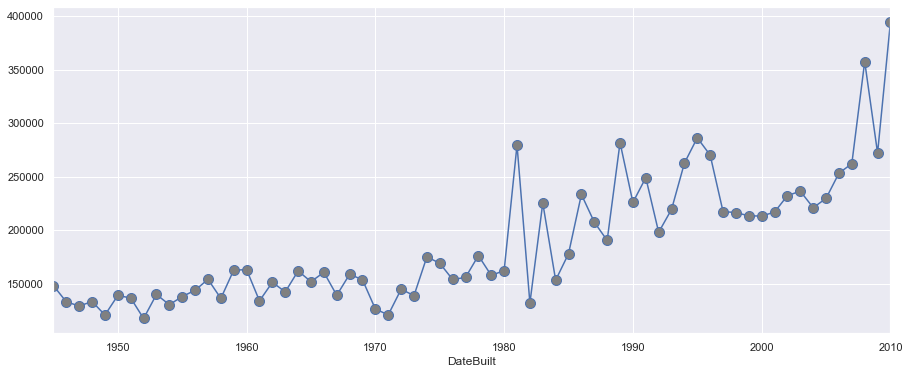

In [88]:
fig = plt.figure(facecolor='w', figsize = (12,6))
df_ts_ms.plot(figsize = (15,6), marker = 'o', markersize = 10, markerfacecolor = 'gray')
plt.show()

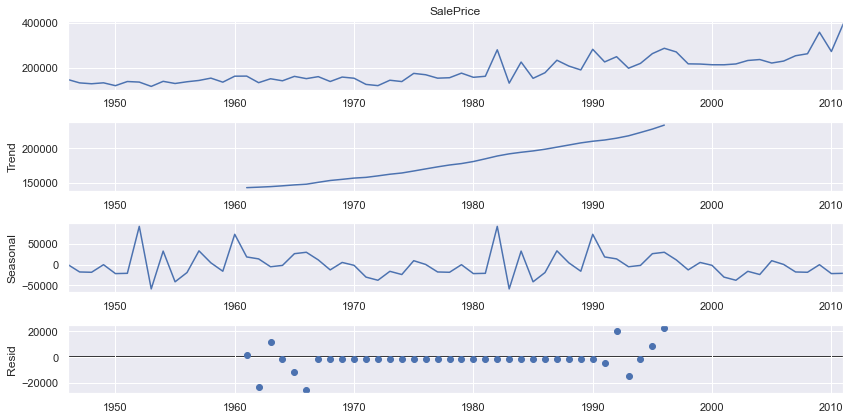

In [110]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = 12,6
decomposition = sm.tsa.seasonal_decompose(df_ts_ms, model='additive', period=30)
fig = decomposition.plot()
plt.show()

In [90]:
import itertools
p = d = q = range(0,2)
# para SARIMAX
# P es la parte progresiva del 
# D incluye los términos de diferenciación entre el pasado y el futuro
# Q tamaño de la media que nos sirve para estimar el futuro
# AIC Arkaike Information Criteria
# este estimador nos permite encontrar los mejores parámetros para SARIMAX
pdq = list(itertools.product(p,d,q))
# Para meter temporalidad
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list( itertools.product(p,d,q))]
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [91]:
for param in pdq:
    for param_estacional in seasonal_pdq:
        try:
            mod= sm.tsa.statespace.SARIMAX(tech_ms,order=param,seasonal_order=param_estacional, enforce_stationarity = False)
            results = mod.fit()
            print(f'ARIMA {param} x {param_estacional}12 - AIC:{results.aic}')
        except:
            continue

In [92]:
mod = sm.tsa.statespace.SARIMAX(df_ts_ms, order= (1,1,1), seasonal_order=(1,1,0,12), enforce_stationarity=False)
resultados = mod.fit()

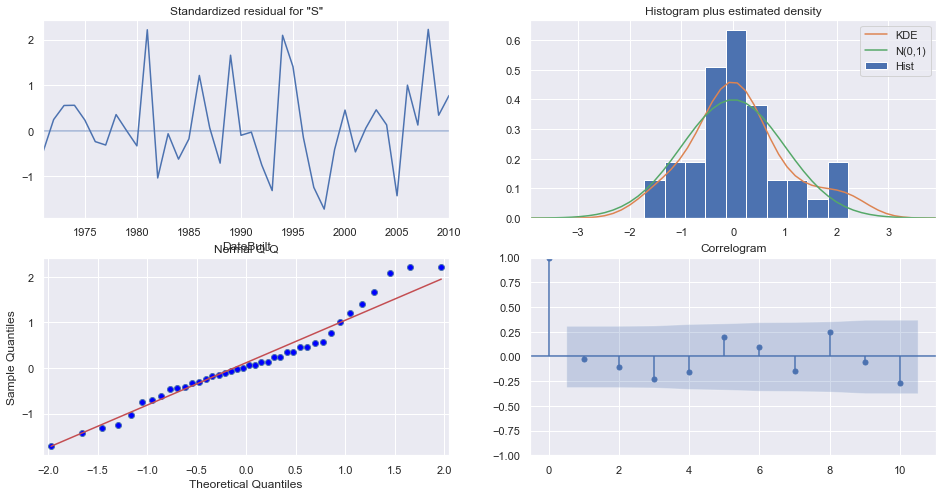

In [93]:
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

In [94]:
predicciones = resultados.get_prediction(start=pd.to_datetime('2000-12-31'))
pred_conf_int = predicciones.conf_int()

In [ ]:
pred_conf_int

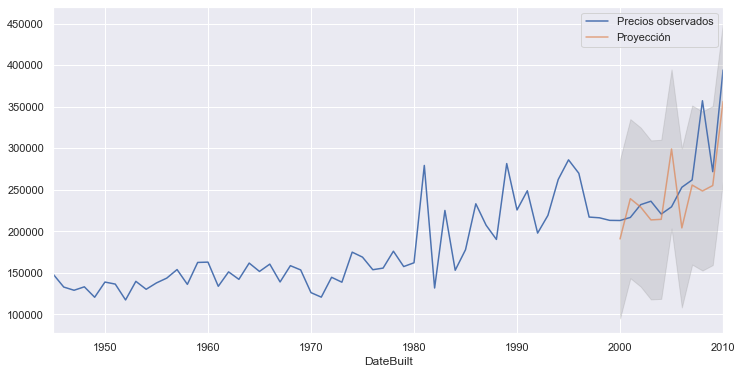

In [100]:
ax = df_ts_ms['1945':].plot(label = 'Precios observados')
predicciones.predicted_mean.plot(ax=ax, label= 'Proyección', alpha = 0.7, figsize=(12,6))
ax.fill_between(pred_conf_int.index, pred_conf_int.iloc[:,0], pred_conf_int.iloc[:,1], color='gray', alpha = 0.2)
plt.legend()
plt.show()

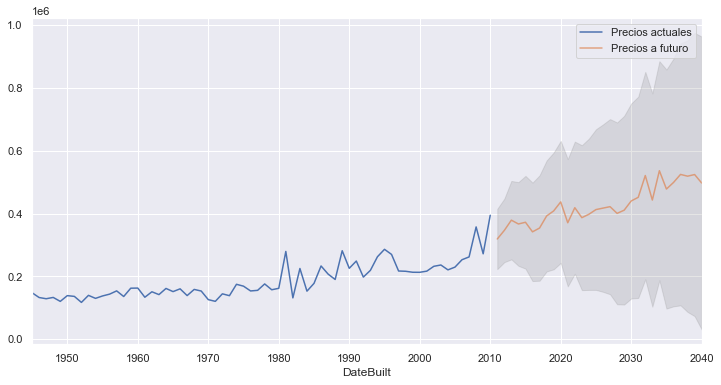

In [99]:
prediccion_futurista = resultados.get_forecast(steps=30) # 30 años
pred_ci=prediccion_futurista.conf_int()
ax = df_ts_ms.plot(label='Precios actuales')
prediccion_futurista.predicted_mean.plot(ax=ax, label ='Precios a futuro', alpha =.7, figsize=(12,6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='gray',
                alpha=.2)
plt.legend()
plt.show()

In [ ]:
df_train['HeatingQC'].unique()

In [ ]:
# Comparando por Zonas para confirmar que lo mostrado en la gráfica efectivamente, los precios de casas por zona 
# si tienen diferencias
#Zonas residenciales RL vs RM
ttest_ind(df_train['SalePrice'][df_train['MSZoning']=='RL'],
                df_train['SalePrice'][df_train['MSZoning']=='RM'],nan_policy='omit')
# 

In [ ]:
# fig = go.Figure(go.Histogram(x=df_train['SalePrice'],text="Precios"))
# fig.update_layout(
#     title={
#         'text': "Histograma de Precios",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})
# fig.show()

df_train.hist('SalePrice')